In [3]:
import numpy as np
np.random.seed(7)

# 데이터 로딩, 시작 36행은 건너뜀
data = np.genfromtxt("c:/data/regression/x09.txt", skip_header=36)
data[:10]

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.]])

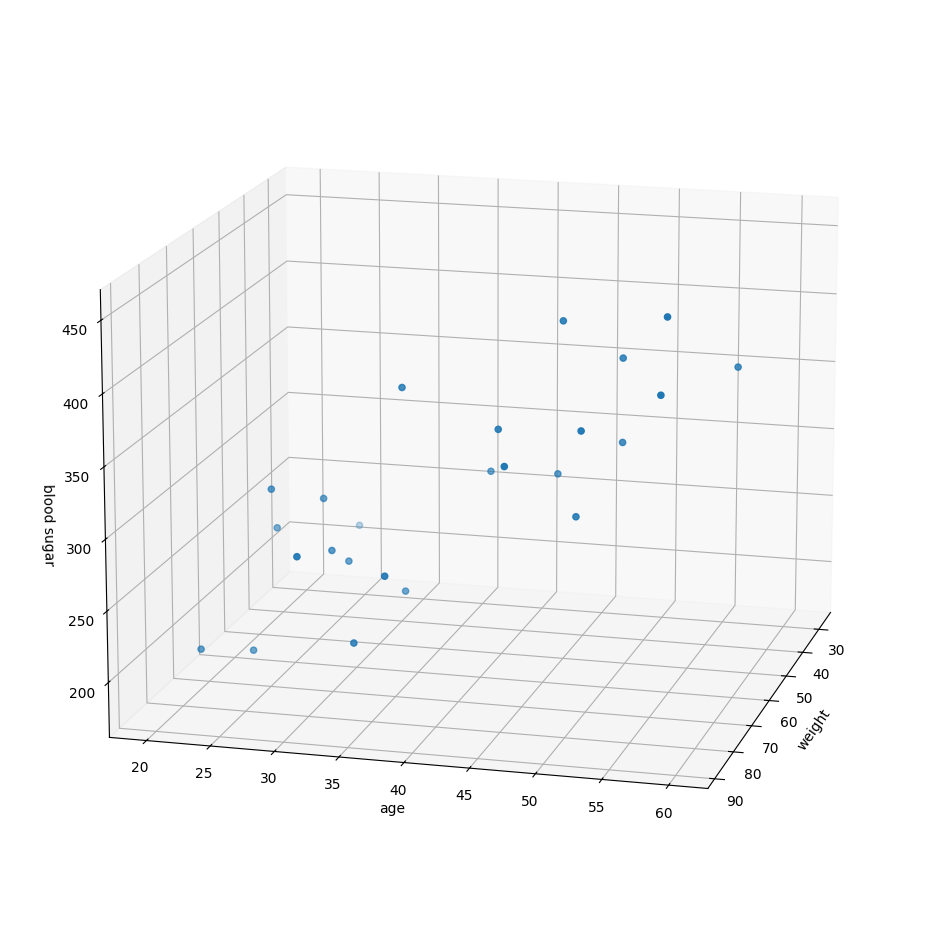

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

xdata = np.array(data[:, 2], dtype=np.float32)
ydata = np.array(data[:, 3], dtype=np.float32)
zdata = np.array(data[:, 4], dtype=np.float32)
fig = plt.figure(figsize=(12, 12))
# 111 : 1행 1열 1번
# 3d : 3차원 그래프
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xdata, ydata, zdata)
ax.set_xlabel("weight")
ax.set_ylabel("age")
ax.set_zlabel("blood sugar")
ax.view_init(15, 15) # 출력 각도 설정
plt.show()

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
# 데이터를 케라스에 맞게 변환
# 독립변수
x_data = np.array(data[:,2:4], dtype=np.float32)

# 종속변수
y_data = np.array(data[:, 4], dtype=np.float32)

In [6]:
# 회귀분석 모델 생성
# Sequential : 신경망 모형
model = Sequential()
# Dense : 밀집행렬
# Dense(output, input)
# 레이어 추가
model.add(Dense(1, input_shape=(2,)))

# 손실함수 : 인공신경망에서 학습을 통해 최적의 가중치 매개변수를 결정하기 위한 기준으로 사용하는 함수(오차를 계산하는 함수)

# 최적화함수 : 오차를 줄이기 위해 weight, bias 를 수정하는 함수

# 손실함수의 결과값을 가장 작게 만드는 것이 신경망 학습의 목표

# 손실함수의 결과값을 작게 만들기 위해 가중치 매개변수를 조절해가는 과정이 학습 과정

# 평균제곱오차(Meam Squared Error, MSE), 회귀분석에서 많이 사용하는 손실함수

# https://keras.io/ko/optimizers/  옵티마이저 참조

rmsprop = RMSprop(learning_rate=0.01) # 학습률 0.01
model.compile(loss='mse', optimizer=rmsprop)
model.summary()

c:\python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

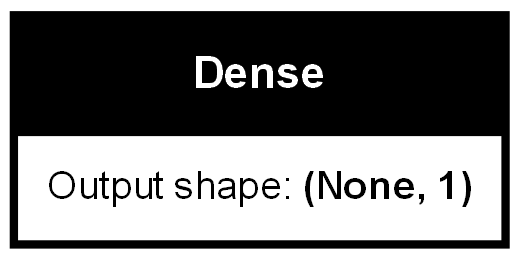

In [7]:
from keras.utils import plot_model
plot_model(model, show_shapes=True)

In [8]:
hist = model.fit(x_data, y_data, epochs=1000)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: 57690.3945
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 56067.8438
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 54914.2812
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 53962.2461
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 53127.2461
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 52370.1484
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 51669.2188
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 51010.9297
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 50386.2461
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 49788.8008
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 49213.9219
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 48658.0547
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 48118.4766
Epoch 14/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 47592.9805
Epoch 15/1000
1/1 

In [9]:
hist.history.keys()

dict_keys(['loss'])

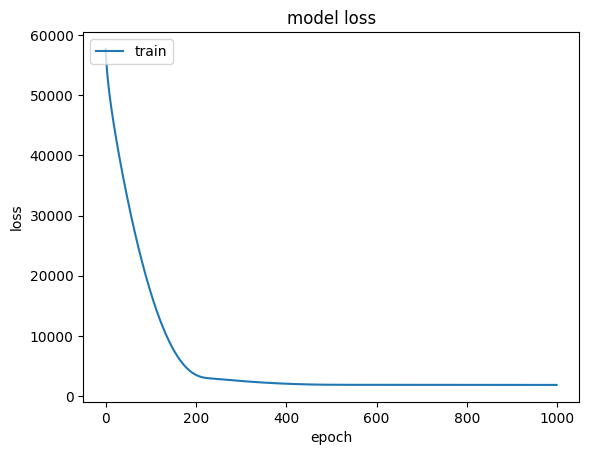

In [10]:
plt.plot(hist.history["loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train"], loc="upper left")
plt.show()

In [11]:
# 새로운 데이터로 예측
# 체중 100kg, 40세
# 1차원 배열을 1행 2열의 2차원 배열로 변환
model.predict(np.array([100,40]).reshape(1,2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[351.9199]], dtype=float32)

In [12]:
# 체중 60kg, 25세
# 1차원 배열을 1행 2열의 2차원 배열로 변환
model.predict(np.array([60,25]).reshape(1,2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


array([[220.457]], dtype=float32)

In [13]:
# 회귀선을 그리기 위한 작업
# 가중치와 절편, 편향(bias)
w, b = model.get_weights()
w, b

(array([[1.2040066],
        [5.553509 ]], dtype=float32),
 array([9.378873], dtype=float32))

In [14]:
# linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)

# start부터 stop의 범위에서 num개를 균일한 간격으로 데이터를 생성하고 배열을 만드는 함수

In [15]:
x = np.linspace(20,100,50).reshape(50,1)
y = np.linspace(10,70,50).reshape(50,1)
x2 = np.concatenate((x,y), axis=1) # x, y 연결
# 행렬 곱셈
z = np.matmul(x2, w) + b

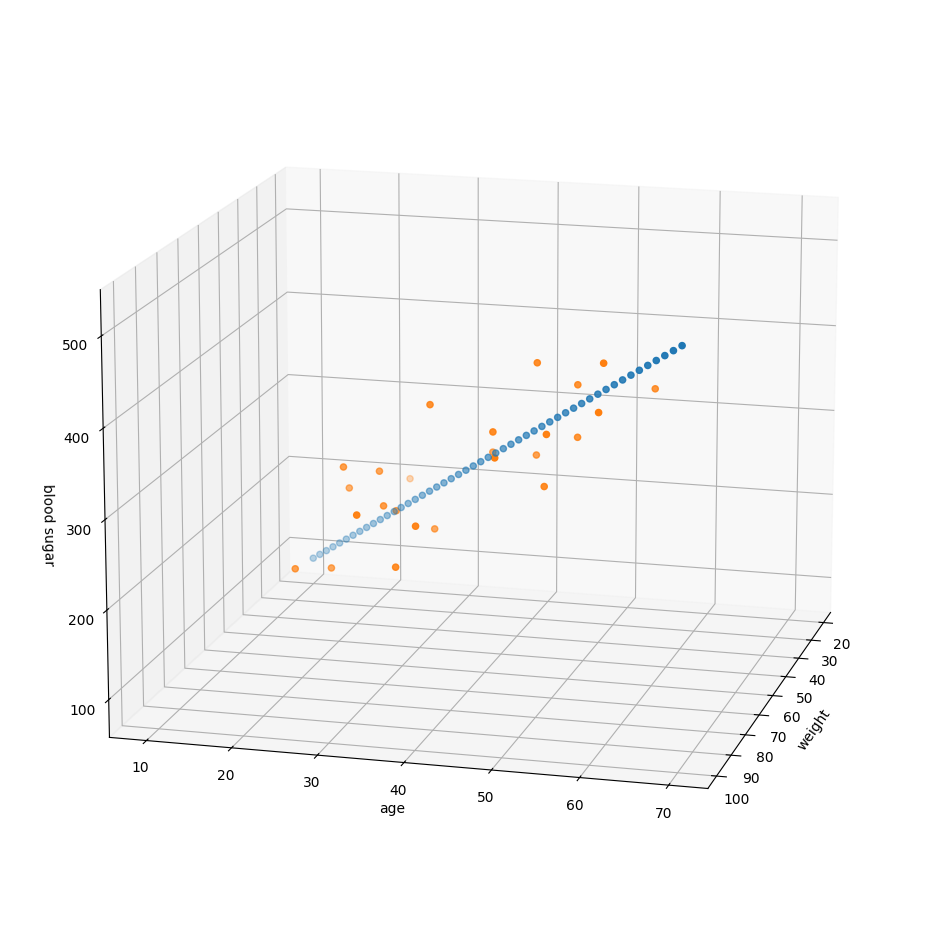

In [16]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
# 회귀선
ax.scatter(x, y, z)

# 산점도
ax.scatter(xdata, ydata, zdata)
ax.set_xlabel("weight")
ax.set_ylabel("age")
ax.set_zlabel("blood sugar")
ax.view_init(15, 15)
plt.show()